# Introduction

Agglomerative clustering is a hierarchical clustering algorithm that groups similar data points together. It starts with each data point as a separate cluster and then combines these clusters iteratively based on their similarity until all data points belong to a single cluster. In this lab, we will explore the effect of imposing a connectivity graph to capture local structure in the data.

# Import Required Libraries

We will start by importing the required libraries, including **numpy**, **matplotlib**, and **sklearn**.

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate Sample Data

We generate sample data by creating a sine wave with random noise.

In [2]:
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X = np.concatenate((x, y))
X += 0.7 * np.random.randn(2, n_samples)
X = X.T

# Create a Graph

Create a graph capturing local connectivity. Larger number of neighbors will give more homogeneous clusters at the cost of computation time. A very large number of neighbors gives more evenly distributed cluster sizes but may not impose the local manifold structure of the data.

In [3]:
knn_graph = kneighbors_graph(X, 30, include_self=False)

# Visualize Clustering without Connectivity

Visualize the clustering without connectivity by plotting the data points with different colors.

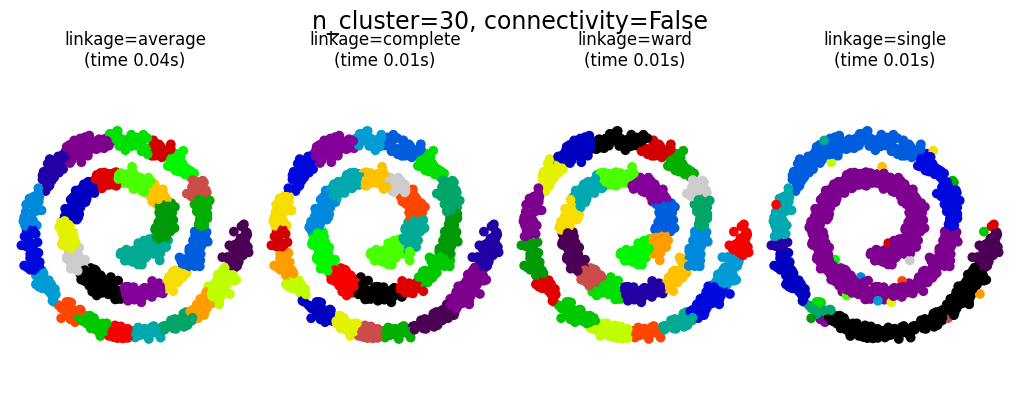

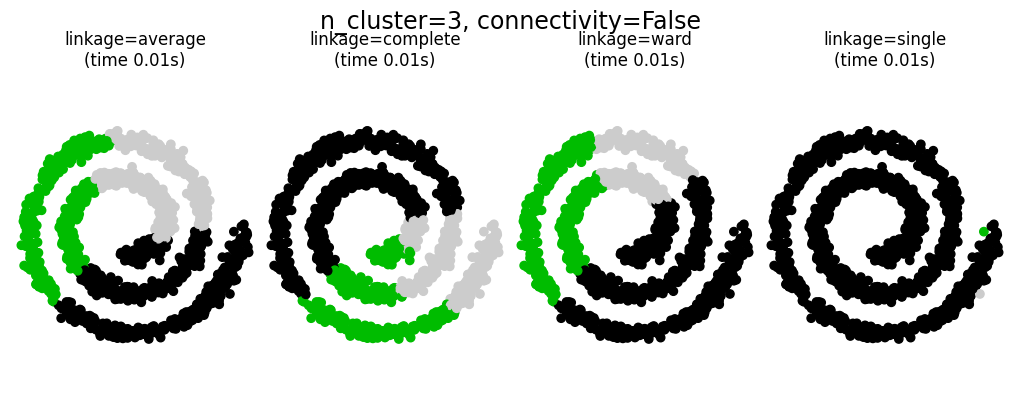

In [4]:
for n_clusters in (30, 3):
    plt.figure(figsize=(10, 4))
    for index, linkage in enumerate(("average", "complete", "ward", "single")):
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(
            linkage=linkage, connectivity=None, n_clusters=n_clusters
        )
        t0 = time.time()
        model.fit(X)
        elapsed_time = time.time() - t0
        plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
        plt.title(
            "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
            fontdict=dict(verticalalignment="top"),
        )
        plt.axis("equal")
        plt.axis("off")

        plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
        plt.suptitle(
            "n_cluster=%i, connectivity=%r"
            % (n_clusters, False),
            size=17,
        )

plt.show()

# Visualize Clustering with Connectivity

Visualize Clustering with Connectivity

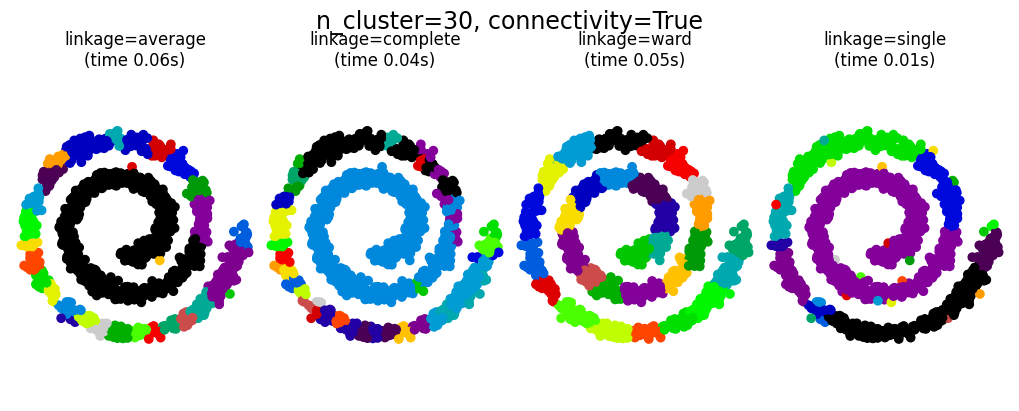

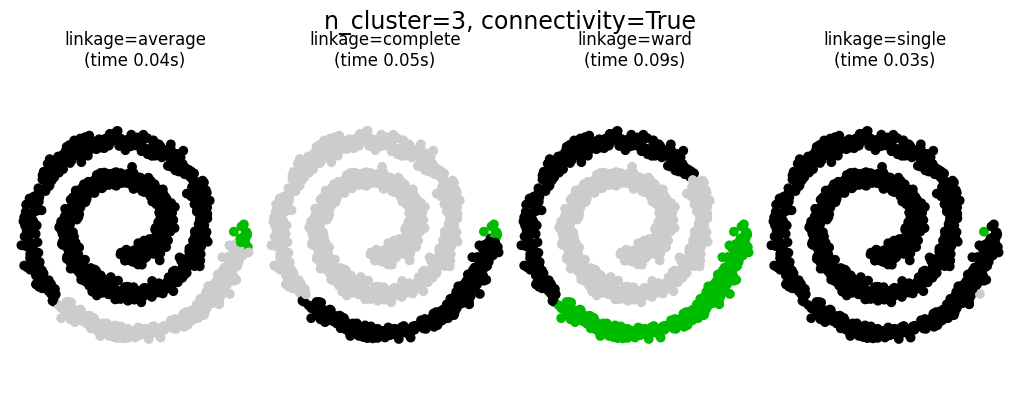

In [5]:
for n_clusters in (30, 3):
    plt.figure(figsize=(10, 4))
    for index, linkage in enumerate(("average", "complete", "ward", "single")):
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(
            linkage=linkage, connectivity=knn_graph, n_clusters=n_clusters
        )
        t0 = time.time()
        model.fit(X)
        elapsed_time = time.time() - t0
        plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
        plt.title(
            "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
            fontdict=dict(verticalalignment="top"),
        )
        plt.axis("equal")
        plt.axis("off")

        plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
        plt.suptitle(
            "n_cluster=%i, connectivity=%r"
            % (n_clusters, True),
            size=17,
        )

plt.show()

# Summary

In this lab, we explored the effect of imposing a connectivity graph to capture local structure in the data using Agglomerative Clustering. We visualized the clustering with and without connectivity and observed that using a connectivity graph can lead to more stable and meaningful clusters. We also observed that a larger number of neighbors leads to more homogeneous clusters at the cost of computation time.